# Data Exploratory Data Analysis - Non-numeric Features
### Date: Oct 6, 2020
### Ali Eddeb
#### Goal: Explore freelancer project data to find trends in the job demand and competition. Specifically, looking at non-numeric features such as the project title, description and tags.

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import ast
import sys
import os
%matplotlib inline

In [2]:
#import custom module
cwd = os.getcwd()
scripts_dir = os.path.join(cwd, 'scripts')
sys.path.insert(1, scripts_dir)
import clean as cl
import text as tx

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ali_e\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#load in data with cleaning steps
df = cl.clean_df(pd.read_csv('data/2020-09-06_data.csv'))
df.head()

,job_title,description,url,tags,price,avg_bid,bids,days_remaining,verified_payment,promotions,contest,price_min,price_max
0,I need 20 Typewritters for typing 2190 page in...,I need you to write some articles.,/projects/articles/need-typewritters-for-typin...,"['Article Rewriting', 'Article Writing', 'Ghos...",NaN,0,0,6,0,[],0,15.0,25.0
1,College Application Essay,Hello. I'm looking for someone who can write m...,/projects/research-writing/college-application...,"['Academic Writing', 'Creative Writing', 'Essa...",10.0,1,2,6,0,[],0,NaN,NaN
2,Write a Training Website Content ( Read- Give...,"Hi,I am looking for someone to write a trainin...",/projects/content-writing/write-training-websi...,"['Article Rewriting', 'Article Writing', 'Cont...",NaN,0,0,6,1,[],0,10.0,30.0
3,Develop Excel Dashboard,Looking for professional to Develop Excel Dash...,/projects/excel/develop-excel-dashboard/,"['Excel', 'Excel VBA', 'Microsoft Office']",56.0,1,4,6,1,[],0,NaN,NaN
4,Looking for a Front End Web Developer,Hello Folks!We are looking for a freelance fro...,/projects/html/looking-for-front-end-web-27255...,"['Bootstrap', 'CSS', 'HTML', 'PHP', 'Website D...",NaN,0,0,6,0,[],0,20.0,171.0


In [4]:
df.shape

(18163, 13)

In [5]:
#for the purpose of this notebook, we are not interested in projects that are actually contests - we want actual projects...let's remove them
#1. Get index of projects that are contests
contest_index = df[df['contest']==1].index
#2. Drop those rows as well as the contest column as it is no longer relevant. And reset index.
df = df.drop(contest_index, axis=0).drop('contest', axis=1).reset_index(drop=True)
df

,job_title,description,url,tags,price,avg_bid,bids,days_remaining,verified_payment,promotions,price_min,price_max
0,I need 20 Typewritters for typing 2190 page in...,I need you to write some articles.,/projects/articles/need-typewritters-for-typin...,"['Article Rewriting', 'Article Writing', 'Ghos...",NaN,0,0,6,0,[],15.0,25.0
1,College Application Essay,Hello. I'm looking for someone who can write m...,/projects/research-writing/college-application...,"['Academic Writing', 'Creative Writing', 'Essa...",10.0,1,2,6,0,[],NaN,NaN
2,Write a Training Website Content ( Read- Give...,"Hi,I am looking for someone to write a trainin...",/projects/content-writing/write-training-websi...,"['Article Rewriting', 'Article Writing', 'Cont...",NaN,0,0,6,1,[],10.0,30.0
3,Develop Excel Dashboard,Looking for professional to Develop Excel Dash...,/projects/excel/develop-excel-dashboard/,"['Excel', 'Excel VBA', 'Microsoft Office']",56.0,1,4,6,1,[],NaN,NaN
4,Looking for a Front End Web Developer,Hello Folks!We are looking for a freelance fro...,/projects/html/looking-for-front-end-web-27255...,"['Bootstrap', 'CSS', 'HTML', 'PHP', 'Website D...",NaN,0,0,6,0,[],20.0,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17040,D3.js expert for multiple jobs,I need a D3.js expert for my current projects....,/projects/javascript/expert-for-multiple-jobs/,"['D3.js', 'Dthreejs', 'HTML5', 'JavaScript', '...",NaN,0,3,6,0,['Sealed'],20.0,168.0
17041,D3.js expert required..,I need a D3.js expert for my current projects....,/projects/javascript/expert-required-26616042/,"['CSS', 'Dthreejs', 'HTML5', 'JavaScript', 'jQ...",NaN,0,2,6,0,['Sealed'],7.0,58.0
17042,D3.js expern....,I need a D3.js expert for my current projects....,/projects/javascript/expern-26615958/,"['CSS', 'Dthreejs', 'HTML5', 'JavaScript', 'jQ...",NaN,0,2,6,0,['Sealed'],20.0,168.0
17043,D3.js expern..,I need a D3.js expert for my current projects....,/projects/javascript/expern-26615927/,"['CSS', 'Dthreejs', 'HTML5', 'JavaScript', 'jQ...",NaN,0,3,6,0,['Sealed'],20.0,167.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17045 entries, 0 to 17044
Data columns (total 12 columns):
job_title           17045 non-null object
description         17045 non-null object
url                 17045 non-null object
tags                17045 non-null object
price               16278 non-null float64
avg_bid             17045 non-null int32
bids                17045 non-null int32
days_remaining      17045 non-null int32
verified_payment    17045 non-null int32
promotions          17045 non-null object
price_min           767 non-null float64
price_max           767 non-null float64
dtypes: float64(3), int32(4), object(5)
memory usage: 1.3+ MB


From above, we can see the non-numeric (ie. object) columns are:
- job_title
- description
- url
- tags
- promotions

We can ignore url so only have 4 features to work with and explore.

## Promotions

In [7]:
df.promotions.unique()

array(['[]', "['Sealed']", "['Local']",
       "['Featured', 'Urgent', 'Sealed']", "['NDA']", "['Featured']",
       "['Urgent']", "['Sealed', 'NDA']", "['Featured', 'NDA']",
       "['Urgent', 'NDA']", "['Featured', 'Sealed']",
       "['Featured', 'Sealed', 'NDA']", "['Urgent', 'Full Time', 'NDA']",
       "['Local', 'Featured']",
       "['Local', 'Featured', 'Urgent', 'Sealed', 'NDA']"], dtype=object)

Promotions don't seem to provide a lot of information for our main goal so we shall skip this feature.

## Tags

Tags represent the different skills or technologies required for the completion of a project. Tags for each project are contained within a list. For example:

In [8]:
#some examples
df.tags.head()

0    ['Article Rewriting', 'Article Writing', 'Ghos...
1    ['Academic Writing', 'Creative Writing', 'Essa...
2    ['Article Rewriting', 'Article Writing', 'Cont...
3           ['Excel', 'Excel VBA', 'Microsoft Office']
4    ['Bootstrap', 'CSS', 'HTML', 'PHP', 'Website D...
Name: tags, dtype: object

So we need to tokenize these lists in order to figure out which are most in demand skills/technologies. We can use a **multilabelbinarizer** to tokenize the list of tags.

In [9]:
#insantiate mlb
mlb_t = MultiLabelBinarizer()

#Note! The lists contained in the tags column are in string representations of lists so need to convert the string lists into pure lists using the ast.literal_eval function
tags_list_series = df['tags'].apply(lambda x : ast.literal_eval(x))

In [10]:
df_tags = pd.DataFrame(mlb_t.fit_transform(tags_list_series),columns=mlb_t.classes_, index=df.index)
df_tags

,.NET,.NET Core,2D Animation,360-degree video,3D Animation,3D Design,3D Model Maker,3D Modelling,3D Printing,3D Rendering,...,iOS Development,iPad,iPhone,jQuery,jQuery / Prototype,jqGrid,phpMyAdmin,vBulletin,vTiger,x86/x64 Assembler
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Results in 1306 different tags! With this representation, we can now explore the most in demand and popular skills and technologies.

In [11]:
#let's sum them and sort them
tags = df_tags.sum(axis=0).sort_values(ascending=False)
tags

PHP                4239
Website Design     3455
Graphic Design     3349
HTML               3185
WordPress          1662
                   ... 
Vector Calculus       1
Varnish Cache         1
DotNetNuke            1
Dovecot               1
GIMP                  1
Length: 1306, dtype: int64

In [12]:
#adjusting plot settings
plt.rcParams["figure.figsize"] = (12,6)
sns.set_style("darkgrid")

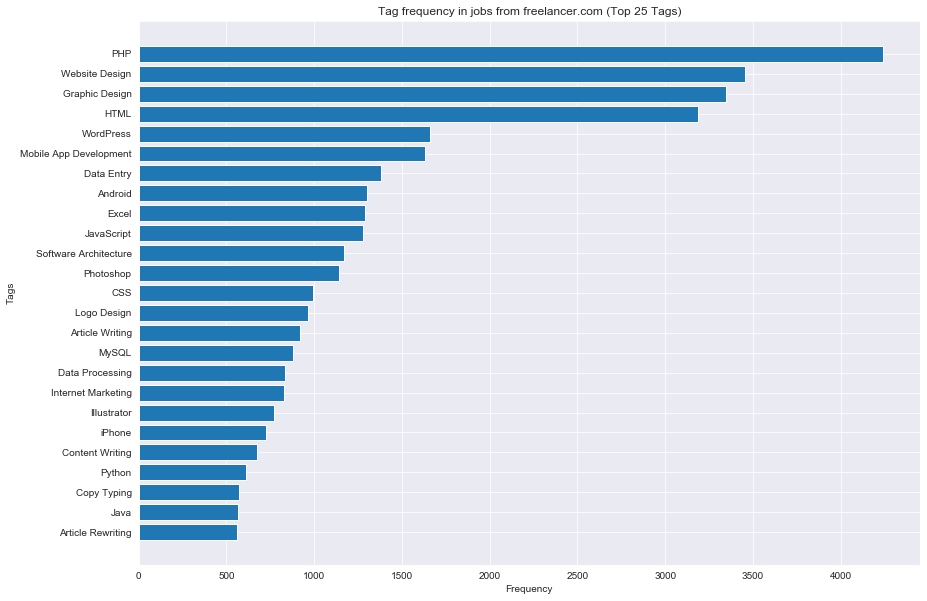

In [13]:
#let's visualize the top 25 tags
plt.figure(figsize = (14,10))
plt.barh(tags[0:25].sort_values().index, tags[0:25].sort_values().values)
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.title('Tag frequency in jobs from freelancer.com (Top 25 Tags)')
plt.show()

We can see that a lot of the most popular tags are related to web development. It would be great to the most popular groupings of tags and perhaps labelling projects based on their tags.

In [14]:
#let's check out the most popular groups of tags
df.tags.value_counts()[0:15]

['Graphic Design', 'HTML', 'PHP', 'Website Design', 'WordPress']                              609
['CSS', 'HTML', 'PHP', 'Website Design', 'WordPress']                                         236
['Blog Install', 'Graphic Design', 'PHP', 'Website Design']                                   200
['Android', 'Mobile App Development']                                                         200
['Copy Typing', 'Data Entry', 'Data Processing', 'Excel', 'Word']                             133
['Article Rewriting', 'Copy Typing', 'Data Entry', 'Data Processing', 'Excel']                125
['CSS', 'Graphic Design', 'HTML', 'PHP', 'Website Design']                                    122
['Article Rewriting', 'Article Writing', 'Data Entry', 'Data Processing', 'Excel']            118
['Excel']                                                                                     110
['Graphic Design', 'Illustrator', 'Logo Design', 'Photoshop']                                  93
['Article Rewriting'

Perhaps we can create groupings based on tags and then based on the grouping, we can assign a project to a type of task e.g. Web dev, data analytics, etc.

### Dimensionality Reduction
Before clustering, let's reduce dimensionality because we have 1306 features!

Let's figure out how many features to eliminate. We could use PCA however a more unique way would be to elimiate the tags that occur rarely in the dataset.

In [25]:
#let's see how many features would remain if we set a minimum number of occurences a tag must have in the dataset
numbers = range(1,41)
features = []

for num in numbers:
    num_features = len(tags[tags >= num])
    features.append(num_features)

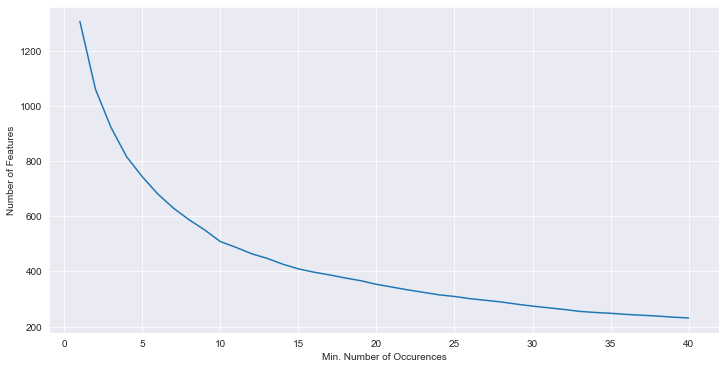

In [26]:
#now let's plot the above
plt.plot(numbers, features)
plt.xlabel('Min. Number of Occurences')
plt.ylabel('Number of Features')
plt.show()

At 15 occurence, we get about 400 features. From there, the descent is less steep so let's experiment with 15 being the minimum number of occurences.

In [31]:
#get the index for the tags that meet the requirement of a minimum of 15 occurences
reduced_features = tags[tags >= 15].index
reduced_features

Index(['PHP', 'Website Design', 'Graphic Design', 'HTML', 'WordPress',
       'Mobile App Development', 'Data Entry', 'Android', 'Excel',
       'JavaScript',
       ...
       'Dart', 'French (Canadian)', 'Process Automation', 'Video Processing',
       'BPO', 'Tensorflow', 'Redux.js', 'Product Sourcing',
       'Traditional Chinese (Hong Kong)', 'Typing'],
      dtype='object', length=409)

In [33]:
#now we can extract just the features of interest
df_reduced = df_tags.loc[:,reduced_features]
df_reduced

,PHP,Website Design,Graphic Design,HTML,WordPress,Mobile App Development,Data Entry,Android,Excel,JavaScript,...,Dart,French (Canadian),Process Automation,Video Processing,BPO,Tensorflow,Redux.js,Product Sourcing,Traditional Chinese (Hong Kong),Typing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17040,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17041,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17042,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17043,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Document Clustering

Let's try to cluster groups based on their tags. Will use HDBSCAN to cluster the projects.

In [44]:
import hdbscan
import pickle

In [35]:
#we need to determine the best hyperparameters for the cluster model
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, cluster_selection_epsilon=0.4)

In [36]:
%%time
clusterer.fit(df_reduced)

Wall time: 2min 41s


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.4,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=4, min_samples=None, p=None,
        prediction_data=False)

In [43]:
len(np.unique(clusterer.labels_))

828

That's too many clusters! We need to adjust the hyperparameters to get a more reasonable number of clusters.

#save the model
with open('models/minclust4_eps0.4.pkl', 'wb') as output_model:
    pickle.dump(clusterer, output_model)